# Recognizing handwritten digits

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#scikit learn 
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.vis_utils import plot_model


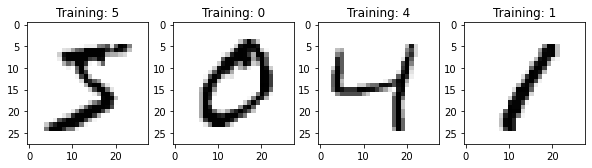

In [5]:
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()
digits=X_train

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Flattened model

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 4s - loss: 0.2774 - accuracy: 0.9220 - val_loss: 0.1343 - val_accuracy: 0.9590
Epoch 2/10
300/300 - 4s - loss: 0.1101 - accuracy: 0.9687 - val_loss: 0.0944 - val_accuracy: 0.9717
Epoch 3/10
300/300 - 4s - loss: 0.0717 - accuracy: 0.9791 - val_loss: 0.0824 - val_accuracy: 0.9732
Epoch 4/10
300/300 - 4s - loss: 0.0502 - accuracy: 0.9852 - val_loss: 0.0680 - val_accuracy: 0.9787
Epoch 5/10
300/300 - 4s - loss: 0.0358 - accuracy: 0.9898 - val_loss: 0.0662 - val_accuracy: 0.9786
Epoch 6/10
300/300 - 4s - loss: 0.0264 - accuracy: 0.9928 - val_loss: 0.0593 - val_accuracy: 0.9809
Epoch 7/10
300/300 - 4s - loss: 0.0191 - accuracy: 0.9955 - val_loss: 0.0559 - val_accuracy: 0.9826
Epoch 8/10
300/300 - 4s - loss: 0.0140 - accuracy: 0.9970 - val_loss: 0.0633 - val_accuracy: 0.9802
Epoch 9/10
300/300 - 4s - loss: 0.0110 - accuracy: 0.9977 - val_loss: 0.0617 - val_accuracy: 0.9802
Epoch 10/10
300/300 - 4s - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0564 - val_accuracy: 0.9829

# Convolution Neural Network

In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
print(y_train.shape)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = baseline_model()


print(model.summary())


(60000, 28, 28)
(60000,)
(60000, 10)
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
___________

In [5]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 19s - loss: 0.2318 - accuracy: 0.9330 - val_loss: 0.0699 - val_accuracy: 0.9793
Epoch 2/10
300/300 - 18s - loss: 0.0702 - accuracy: 0.9793 - val_loss: 0.0561 - val_accuracy: 0.9823
Epoch 3/10
300/300 - 18s - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0392 - val_accuracy: 0.9874
Epoch 4/10
300/300 - 21s - loss: 0.0404 - accuracy: 0.9872 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 5/10
300/300 - 21s - loss: 0.0337 - accuracy: 0.9897 - val_loss: 0.0356 - val_accuracy: 0.9879
Epoch 6/10
300/300 - 24s - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch 7/10
300/300 - 21s - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0338 - val_accuracy: 0.9888
Epoch 8/10
300/300 - 21s - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0338 - val_accuracy: 0.9894
Epoch 9/10
300/300 - 22s - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch 10/10
300/300 - 21s - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0375 - val_accura

<BarContainer object of 10 artists>

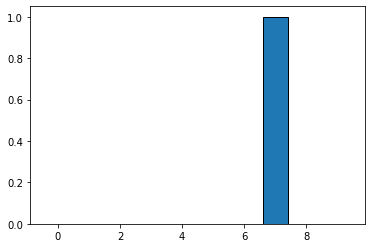

In [6]:
from matplotlib.pyplot import *
bar(range(0,10),model.predict(X_test)[0],edgecolor='k')

# Larger CNN

In [33]:
def larger_model():
# create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)             

In [34]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 16s 53ms/step - loss: 0.3827 - accuracy: 0.8822 - val_loss: 0.0884 - val_accuracy: 0.9721
Epoch 2/10
300/300 [==============================] - 17s 56ms/step - loss: 0.0993 - accuracy: 0.9698 - val_loss: 0.0570 - val_accuracy: 0.9823
Epoch 3/10
300/300 [==============================] - 15s 52ms/step - loss: 0.0713 - accuracy: 0.9772 - val_loss: 0.0420 - val_accuracy: 0.9852
Epoch 4/10
300/300 [==============================] - 16s 52ms/step - loss: 0.0578 - accuracy: 0.9820 - val_loss: 0.0369 - val_accuracy: 0.9878
Epoch 5/10
300/300 [==============================] - 16s 55ms/step - loss: 0.0511 - accuracy: 0.9840 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 6/10
300/300 [==============================] - 16s 53ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0333 - val_accuracy: 0.9874
Epoch 7/10
300/300 [==============================] - 17s 56ms/step - loss: 0.0382 - accuracy: 0.9873 - val_loss: 0.0273 - val_accuracy:

In [42]:
y_prob = model.predict(X_test) 
predicted = y_prob.argmax(axis=-1)
predicted
test = y_test.argmax(axis=-1)

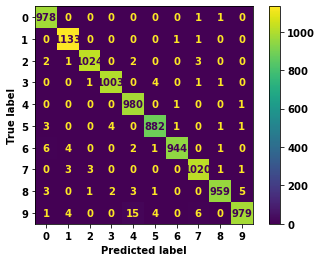

In [43]:
cm = confusion_matrix(test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [53]:
wrong_guesses = np.where(predicted != test)
wrong_guesses

(array([ 259,  359,  449,  582,  646,  659,  691,  947,  965, 1014, 1039,
        1112, 1181, 1226, 1232, 1247, 1260, 1319, 1393, 1522, 1681, 1709,
        1717, 1737, 1790, 1878, 1901, 2035, 2073, 2098, 2118, 2130, 2135,
        2189, 2280, 2293, 2387, 2414, 2426, 2462, 2488, 2597, 2648, 2654,
        2720, 2896, 2921, 2939, 3422, 3503, 3520, 3558, 3727, 3762, 3808,
        3850, 3869, 3985, 4163, 4176, 4205, 4224, 4294, 4369, 4405, 4500,
        4571, 4639, 4699, 4740, 4807, 4823, 4956, 5176, 5757, 5937, 5955,
        5997, 6011, 6173, 6555, 6571, 6572, 6576, 6597, 6651, 6755, 6783,
        6847, 8408, 9009, 9024, 9423, 9642, 9692, 9729, 9770, 9888],
       dtype=int64),)

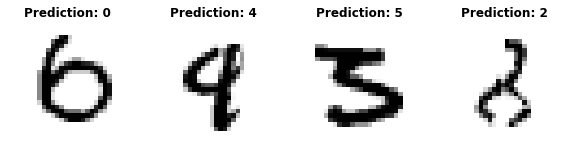

In [54]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test[wrong_guesses], predicted[wrong_guesses]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [55]:
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(test, predicted)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C787FE5748>:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000




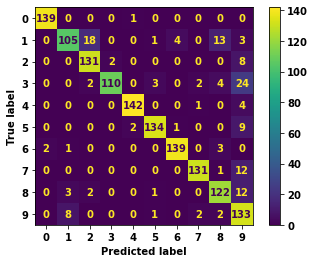

In [45]:
cm = confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()